In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
k = 1
h = 1
B0 = 1
B1 = 1
w = 1
L = 8
theta_B = 40

nodos = 20

In [9]:
def eficiencia(perfil):
    perfil_prueba = B0*np.ones(nodos)
    P = 2*(perfil+B1+w)
    A = (B1+perfil)*w
    dx = L/nodos

    coeficientes = np.zeros((nodos,nodos))
    coeficientes[0,0] = 1 #Theta(0) = Theta_B
    
    coeficientes[-1,-1] = 3
    coeficientes[-1,-2] = -4
    coeficientes[-1,-3] = 1 #theta_i-2 - 4theta_i-1 + 3theta_i = 2theta_prima*deltaX

    constantes = np.zeros(nodos)
    constantes[0] = theta_B

    for i in range(1,nodos-1):

        coeficientes[i,i] = -2*A[i] - h*P[i]*dx**2/k
        coeficientes[i,i-1] = A[i]-(A[i+1]-A[i-1])/4
        coeficientes[i,i+1] = A[i]+(A[i+1]-A[i-1])/4

    A_inv = np.linalg.inv(coeficientes)
    Thetas = np.matmul(A_inv,constantes)
    
    Q = np.trapz(h*P*Thetas,np.linspace(0,L,nodos))
    Qm = np.trapz(h*P*theta_B,np.linspace(0,L,nodos))
    Eta = Q/Qm
    return Eta, Thetas

In [10]:
perfil_prueba = B0*np.ones(nodos)
paso = 0.01
cambio = 1

#while cambio > 0.0001:
for j in range(10):
    gradiente = [0]
    eta,thetas = eficiencia(perfil_prueba)
    for i in range(1,nodos):

        perfil_nuevo = perfil_prueba.copy()
        perfil_nuevo[i] += paso
        eta_i,thetas = eficiencia(perfil_nuevo)
        nabla_i = (eta_i-eta)
        nabla_i *= (1.*(nabla_i<0))#*(1.*(perfil_nuevo[i]>0))
        gradiente.append(nabla_i)

    gradiente = np.array(gradiente)*10
    #cambio = np.sum(np.square(gradiente))
    perfil_prueba = perfil_prueba+gradiente

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.38200004e-05
 -1.34264791e-04 -1.44658046e-04 -1.44713115e-04 -1.43402896e-04
 -1.42395427e-04 -1.41796700e-04 -1.41470650e-04 -1.41299611e-04
 -1.41211445e-04 -1.41166387e-04 -1.41143462e-04 -1.41131832e-04
 -1.41125949e-04 -1.41118373e-04 -1.41119160e-04 -7.05740773e-05]


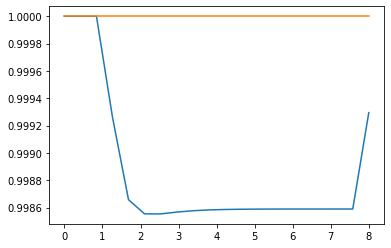

In [11]:
plt.figure()
plt.plot(np.linspace(0,L,20),perfil_prueba)
plt.plot(np.linspace(0,L,20),B0*np.ones(nodos))
#plt.ylim(1.-1E-4,1.+1E-4)
print(gradiente)

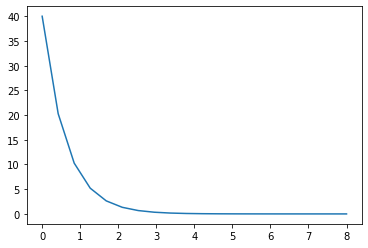

In [12]:
perfil = B0*np.ones(nodos)
eta,thetas = eficiencia(perfil)

plt.figure()
plt.plot(np.linspace(0,L,nodos),thetas)